# Exploring Coursera Courses

This Kaggle notebook delves into the world of Coursera courses through an extensive analysis of the data, aiming to uncover valuable insights into the realm of online education. Leveraging a comprehensive dataset, the analysis explores various aspects, including course distribution, enrollment patterns, top course providers, categories, and temporal trends. The main objective is to gain a deeper understanding of the dynamics shaping the contemporary digital learning landscape and identify universities that offer the most enticing educational opportunities.

## Objectives and Key Questions
Throughout this exploratory analysis, several key questions are addressed to shed light on the landscape of Coursera courses:

1. **Question 01**: What are the top five universities with the most courses?
2. **Question 02**: What is the average number of students enrolled in courses offered by the top 10 universities with the highest enrollment?
3. **Question 03**: Which are the top five universities with the highest average rating, considering universities that offer at least 15 courses?
4. **Question 04**: How many universities have only one course but are rated above 4.81?
5. **Question 05**: What are the top 10 courses with the highest number of students enrolled?
6. **Question 06**: Which are the top five universities with below-average ratings and at least 15 courses in their offerings?
7. **Question 07**: How many universities have only one course and are rated below 4.58?
8. **Question 08**: What is the distribution of course ratings by difficulty level?
9. **Question 09**: Can potential outliers be identified that might impact the overall analysis quality?
10. **Question 10**: How does the certificate type influence the number of students enrolled in courses?
11. **Question 11**: What is the relationship between course ratings and the number of students enrolled, considering different certificate types?
12. **Question 12**: How does the difficulty level of courses vary across different certificate types?

This comprehensive EDA journey aims to offer valuable insights that will guide aspiring learners and professionals in their quest for quality education in the ever-evolving digital learning landscape. The analysis adopts a formal approach to explore the data and draw meaningful conclusions.

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
df = pd.read_csv('/content/drive/MyDrive/TURING/MODULE 1/SPRINT 3/coursea_data.csv')

In [303]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [305]:
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


## DATA CLEANING

In [306]:
df.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [307]:
df.notna().sum()

Unnamed: 0                  891
course_title                891
course_organization         891
course_Certificate_type     891
course_rating               891
course_difficulty           891
course_students_enrolled    891
dtype: int64

In [308]:
df['course_Certificate_type'].unique()

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

In [309]:
df['course_organization'].nunique()

154

In [310]:
df['course_title'].nunique()

888

If it has 888 unique course titles in the dataset, but once it was applied the notna() function, it shows 891 rows, it suggests that there might be some duplicate course titles in this dataset.

To check that, in the following code it used a duplicated code.

* "Developing Your Musicianship" and "Machine Learning," are offered by different course organizations and have different certificate types, ratings, and difficulties.
* "Developing Your Musicianship" has same course organization but both has different difficulty "Mixed" and "Beginner" difficulty levels, each with a rating of 4.8.

Analysis confirms no duplications. Each course entry is unique, reflecting diverse offerings by Coursera, ensuring reliable data for insights.

In [311]:
duplicates = df[df.duplicated(subset='course_title', keep=False)]

print(duplicates)

     Unnamed: 0                  course_title        course_organization  \
224         756  Developing Your Musicianship   Berklee College of Music   
225         205  Developing Your Musicianship   Berklee College of Music   
563         181              Machine Learning   University of Washington   
564           6              Machine Learning        Stanford University   
582         241             Marketing Digital  Universidade de São Paulo   
583         325             Marketing Digital        Universidad Austral   

    course_Certificate_type  course_rating course_difficulty  \
224                  COURSE            4.8             Mixed   
225          SPECIALIZATION            4.8          Beginner   
563          SPECIALIZATION            4.6      Intermediate   
564                  COURSE            4.9             Mixed   
582                  COURSE            4.8          Beginner   
583          SPECIALIZATION            4.7          Beginner   

    course_student

## DATA TRANSFORMATION

Analyzing the dataset and sorting it by the "Unnamed: 0" column reveals that this column has no useful information for this research. This column's values appear to be assigned as identifiers or row indices, with no discernible pattern or logical sequence. As a result, the sorting process provides no useful insights and simply arranges the data in an arbitrary manner. It is prudent to remove the "Unnamed: 0" column from the dataset to optimize the data analysis, enhance computational performance, and eliminate potential misunderstanding from an unimportant feature.

In [312]:
sorted_data = df.sort_values(by='Unnamed: 0', ascending=True)

print(sorted_data.iloc[:10])

     Unnamed: 0                         course_title  \
420           0                     IBM Data Science   
486           1         Introduction to Data Science   
815           2            The Science of Well-Being   
688           3                 Python for Everybody   
392           4                    Google IT Support   
211           5                        Deep Learning   
564           6                     Machine Learning   
113           7                 Business Foundations   
54            8                 Applied Data Science   
142           9  Cloud Engineering with Google Cloud   

            course_organization   course_Certificate_type  course_rating  \
420                         IBM  PROFESSIONAL CERTIFICATE            4.6   
486                         IBM            SPECIALIZATION            4.6   
815             Yale University                    COURSE            4.9   
688      University of Michigan            SPECIALIZATION            4.8   
392

In [313]:
df=df.drop(['Unnamed: 0'], axis=1)

In the following code, data is preprocessed by removing units ('k' and 'm') from 'course_students_enrolled' column to ensure accurate representation of actual enrollments, facilitating analysis and efficiency.

In [329]:
units = {'k': 10**3, 'm': 10**6}

for index, value in enumerate(df['course_students_enrolled']):
    str_value = str(value)
    if str_value[-1] in units:
        df.at[index, 'course_students_enrolled'] = int(float(str_value[:-1]) * units[str_value[-1]])
    else:
        df.at[index, 'course_students_enrolled'] = int(str_value)

df['course_students_enrolled'] = df['course_students_enrolled'].astype('int64')

In [330]:
outliers_summary = {}
for column in df.select_dtypes(include='number'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    num_outliers = ((df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)).sum()
    outliers_summary[column] = num_outliers

print("Summary of Outliers:")
for column, num_outliers in outliers_summary.items():
    print(f"{column}: {num_outliers} outliers")

Summary of Outliers:
course_rating: 17 outliers
course_students_enrolled: 78 outliers


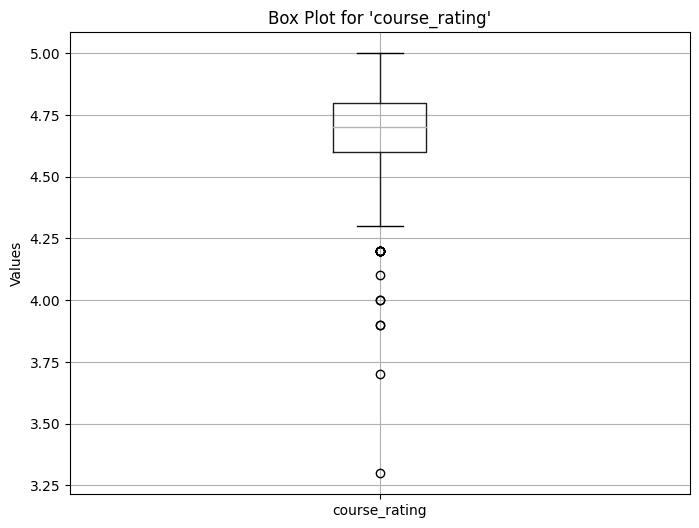


Summary Statistics for 'course_rating':
Minimum: 3.3
Q1: 4.6
Median: 4.7
Q3: 4.8
Maximum: 5.0



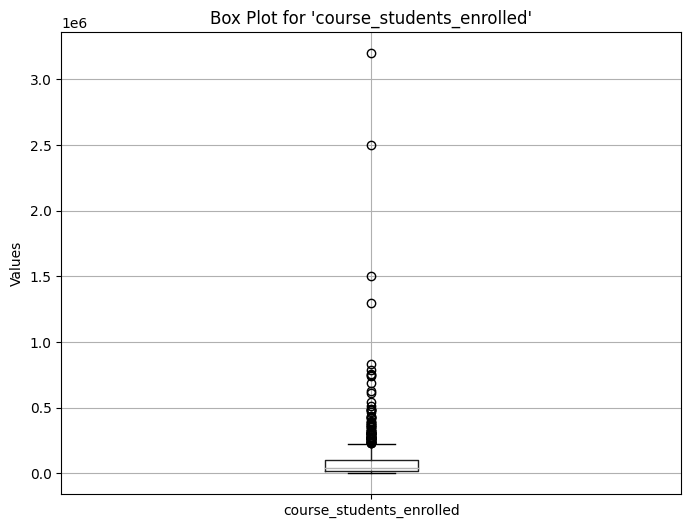


Summary Statistics for 'course_students_enrolled':
Minimum: 1500
Q1: 17500.0
Median: 42000.0
Q3: 99500.0
Maximum: 3200000



In [331]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=col)
    plt.title(f"Box Plot for '{col}'")
    plt.ylabel("Values")
    plt.show()

    print(f"\nSummary Statistics for '{col}':")
    print(f"Minimum: {df[col].min()}")
    print(f"Q1: {df[col].quantile(0.25)}")
    print(f"Median: {df[col].median()}")
    print(f"Q3: {df[col].quantile(0.75)}")
    print(f"Maximum: {df[col].max()}\n")

## DATA ANALYSIS

### **Question 01**: What are the top five universities with the most courses?

 It is evident that there are many organizations contributing courses to the Coursera platform. While the University of Pennsylvania's representation with 6.62% (59 courses) of the total courses may seem relatively small at first glance, it is essential to consider the context and scale of the dataset.

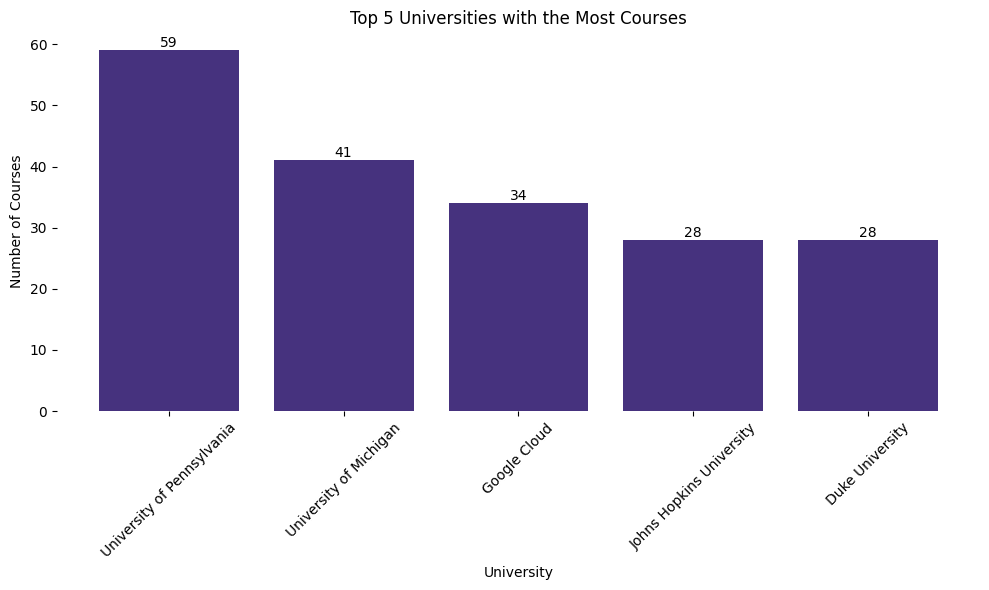

In [317]:
universities_counts = df['course_organization'].value_counts()

top_5_universities = universities_counts.nlargest(5)

with sns.color_palette('viridis'):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_5_universities.index, top_5_universities.values)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

    plt.xlabel('University')
    plt.ylabel('Number of Courses')
    plt.title('Top 5 Universities with the Most Courses')
    plt.xticks(rotation=45)
    sns.despine(left=True, bottom=True)  # Remove left and bottom borders
    plt.tight_layout()
    plt.show()

### **Question 02**: What is the average number of students enrolled in courses offered by the top 10 universities with the highest enrollment?

Among the top 10 highest enrollment universities, the University of Michigan stands out as the only institution that appears in both the graphics representing universities with the most courses. This suggests that the University of Michigan not only offers a wide variety of courses but also attracts a significant number of students to its programs.

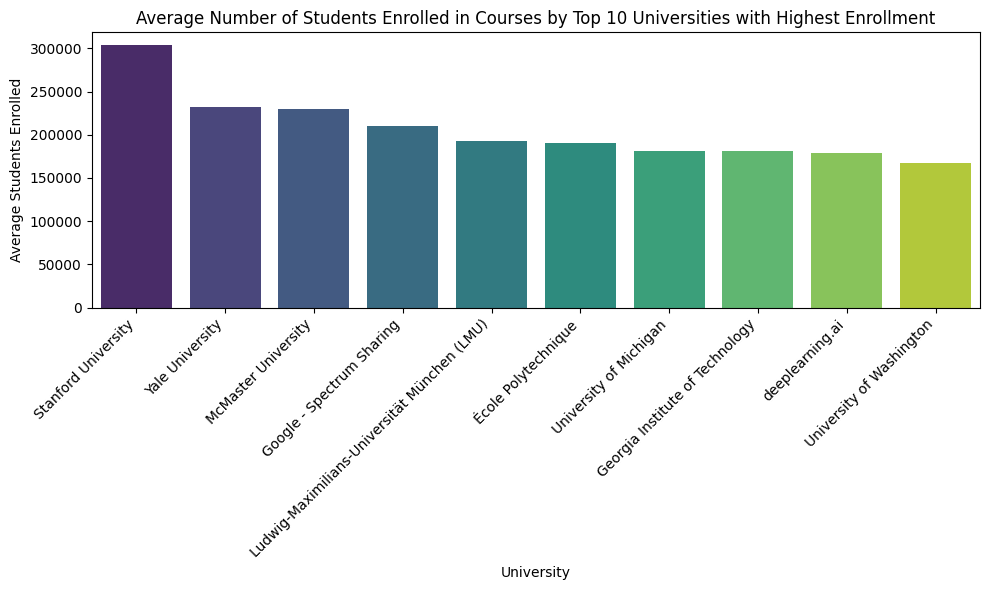

In [318]:
average_students_enrolled_by_university = df.groupby('course_organization')['course_students_enrolled'].mean()

top_10_highly_enrolled_universities = average_students_enrolled_by_university.nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_highly_enrolled_universities.index, y=top_10_highly_enrolled_universities.values, palette='viridis')
plt.title('Average Number of Students Enrolled in Courses by Top 10 Universities with Highest Enrollment')
plt.xlabel('University')
plt.ylabel('Average Students Enrolled')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Question 03**: Which are the top five universities with the highest average rating, considering universities that offer at least 15 courses?


In [319]:
courses_per_university = df['course_organization'].value_counts()

universities_with_15_courses = courses_per_university[courses_per_university >= 15]

df_filtered = df[df['course_organization'].isin(universities_with_15_courses.index)]

average_rating_by_university = df_filtered.groupby('course_organization')['course_rating'].mean()

top_5_highly_rated_universities = average_rating_by_university.nlargest(5)

result_df = pd.DataFrame({
    'University': top_5_highly_rated_universities.index,
    'Number of Courses': universities_with_15_courses.loc[top_5_highly_rated_universities.index],
    'Average Rating': top_5_highly_rated_universities.values
})

result_df['Rank'] = range(1, len(result_df) + 1)

result_df.set_index('Rank', inplace=True)

print(result_df)

                  University  Number of Courses  Average Rating
Rank                                                           
1            Yale University                 17        4.817647
2        Stanford University                 16        4.768750
3            deeplearning.ai                 16        4.743750
4     University of Michigan                 41        4.729268
5     University of Virginia                 19        4.715789


Interestingly, there is no apparent correlation between having the most courses and achieving the highest average ratings. While the University of Michigan offers the most courses (41), it does not rank at the top in terms of average rating. In contrast, several universities with a smaller number of courses, such as Yale University, Stanford University, deeplearning.ai, and the University of Virginia, have achieved higher average ratings.

This observation suggests that the number of courses offered by a university does not directly impact the quality of the courses, as indicated by the average ratings.

### **Question 04**: How many universities have only one course but are rated above 4.81?

The fact that there are 7 universities with only one course and a rating above 4.81 suggests that a university's course quality cannot be solely determined by the number of courses it offers. While we initially chose to focus on the top 5 universities with at least 15 courses, this analysis reveals that some universities with a limited number of courses can still provide exceptional educational experiences, as indicated by their high ratings.

The criteria of selecting universities with at least 15 courses aimed to explore institutions with a broader educational portfolio. However, it's evident that offering more courses does not guarantee higher-rated offerings. The 7 universities with only one course and a rating above 4.81 exemplify the importance of course quality and student satisfaction over sheer course quantity.

In [320]:
universities_with_one_course = courses_per_university[courses_per_university == 1]

df_filtered = df[df['course_organization'].isin(universities_with_one_course.index)]

universities_with_one_course_and_rating_above_481 = df_filtered[df_filtered['course_rating'] > 4.81]['course_organization'].nunique()

average_students_enrolled = df_filtered[df_filtered['course_rating'] > 4.81]['course_students_enrolled'].mean()

print(f"The number of universities with only one course and rated above 4.81 is: {universities_with_one_course_and_rating_above_481} universities with the average of {average_students_enrolled:.0f} students enrolled.")

The number of universities with only one course and rated above 4.81 is: 7 universities with the average of 63829 students enrolled.


### **Question 05**: What are the top 10 courses with the highest number of students enrolled?

In the analysis of the top 10 courses with the highest number of students enrolled, a noteworthy trend emerges when examining the relationship between the course difficulty level, average rating, and student enrollment. Surprisingly, beginner-level courses appear to attract a larger number of students, indicating a high demand for foundational knowledge in these subjects. However, a contrasting pattern becomes apparent when we compare the average ratings across different difficulty levels. Courses classified as "mixed" and "intermediate" demonstrate higher average ratings despite having fewer students enrolled. This observation suggests that these more advanced courses may provide a higher quality of content or instruction, leading to more positive student experiences and feedback.

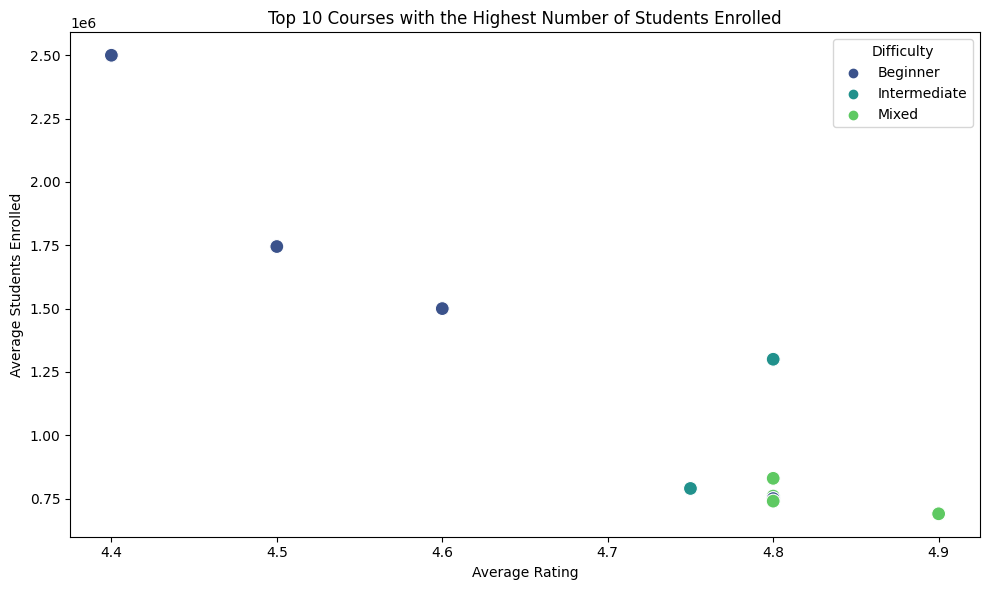

In [321]:
average_rating_by_course = df.groupby('course_title')['course_rating'].mean()
average_students_enrolled_by_course = df.groupby('course_title')['course_students_enrolled'].mean()

top_10_popular_courses = average_students_enrolled_by_course.nlargest(10)

result_df = df[df['course_title'].isin(top_10_popular_courses.index)].groupby('course_title').first().reset_index()
result_df['Average Rating'] = result_df['course_title'].map(average_rating_by_course)
result_df['Average Students Enrolled'] = top_10_popular_courses.values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df, x='Average Rating', y='Average Students Enrolled', hue='course_difficulty', s=100, palette='viridis')
plt.title('Top 10 Courses with the Highest Number of Students Enrolled')
plt.xlabel('Average Rating')
plt.ylabel('Average Students Enrolled')
plt.legend(title='Difficulty', loc='upper right')
plt.tight_layout()
plt.show()

### **Question 06**: Which are the top five universities with below-average ratings and at least 15 courses in their offerings?

Google Cloud stands out for its extensive course offerings with 34 courses, making it one of the most prolific contributors in the dataset. However, its appearance in the top 5 universities with the lowest average ratings raises questions about the overall quality and student satisfaction. This contrast highlights the need for further investigation into potential areas for improvement to enhance the learning experiences they offer.

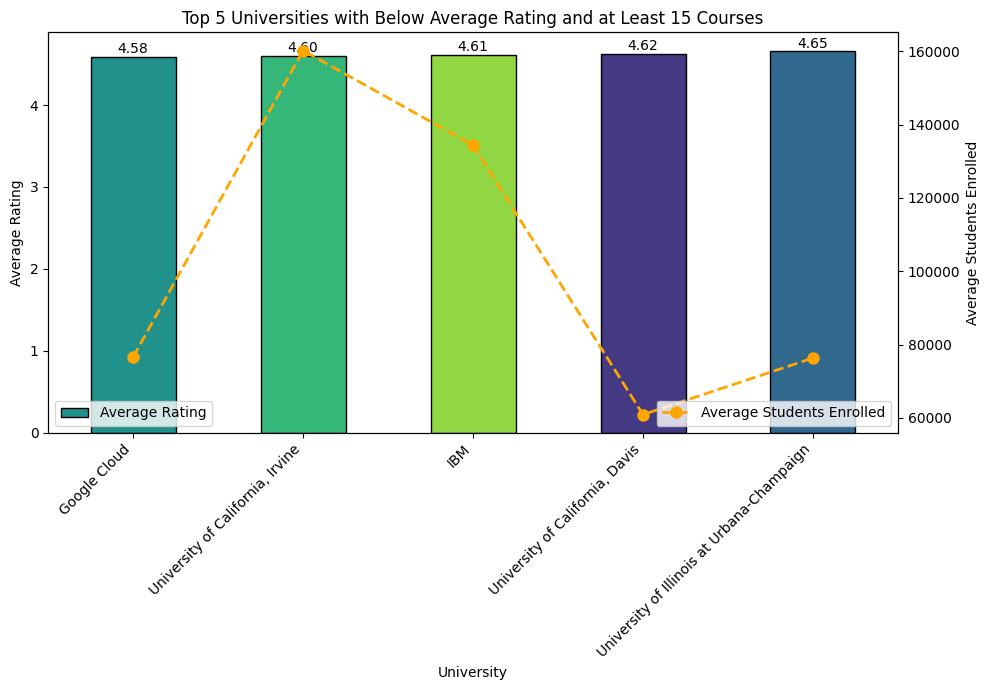

In [322]:
courses_per_university = df.groupby('course_organization')['course_title'].count()

universities_with_15_or_more_courses = courses_per_university[courses_per_university >= 15]

df_filtered = df[df['course_organization'].isin(universities_with_15_or_more_courses.index)]

result_df = pd.DataFrame({'Average Rating': average_rating_by_university,
                          'Average Students Enrolled': average_students_enrolled_by_university})

top_5_below_average_universities = result_df[result_df['Average Rating'] < result_df['Average Rating'].mean()].nsmallest(5, 'Average Rating')

colors = sns.color_palette('viridis', len(top_5_below_average_universities))
colors = colors[len(colors) // 2:] + colors[:len(colors) // 2]
plt.figure(figsize=(10, 7))
ax = top_5_below_average_universities['Average Rating'].plot(kind='bar', color=colors, edgecolor='black', width=0.5, label='Average Rating')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), top_5_below_average_universities['Average Students Enrolled'], color='orange', marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Average Students Enrolled')
ax.set_title('Top 5 Universities with Below Average Rating and at Least 15 Courses')
ax.set_xlabel('University')
ax.set_ylabel('Average Rating')
ax2.set_ylabel('Average Students Enrolled')
ax.set_xticklabels(top_5_below_average_universities.index, rotation=45, ha='right', fontsize=10)
ax.legend(loc='lower left')

for i, v in enumerate(top_5_below_average_universities['Average Rating']):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10, color='black')

ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

### **Question 07**: How many universities have only one course and are rated below 4.58?

This information indicates that while these universities may have a limited course offering, they still attract a significant number of students to their single course. It may be interesting to further investigate the reasons behind the lower ratings and the popularity of these specific courses among students. Additionally, understanding the unique offerings of these universities could shed light on why they have opted for a smaller course selection while maintaining relatively high student enrollment.

In [323]:
universities_with_one_course_and_rating_below_458 = df_filtered[df_filtered['course_rating'] < 4.58]['course_organization'].nunique()

average_students_enrolled = df_filtered[df_filtered['course_rating'] < 4.58]['course_students_enrolled'].mean()

print(f"The number of universities with only one course and rated below 4.58 is: {universities_with_one_course_and_rating_below_458} universities with the average of {average_students_enrolled:.0f} students enrolled.")

The number of universities with only one course and rated below 4.58 is: 13 universities with the average of 101345 students enrolled.


### **Question 08**: What is the distribution of course ratings by difficulty level?

The box plot demonstrates that the courses categorized as "Beginner" and "Intermediate" have higher median ratings and a more evenly distributed range of ratings. This suggests that students generally find these courses to be more satisfactory and consistent in terms of quality and content.

On the other hand, the "Advanced" level courses exhibit a lower median rating and a narrower interquartile range. This indicates that students' opinions about these courses are more polarized, with some rating them highly and others giving them lower scores. The presence of outliers below the lower whisker further emphasizes that there are advanced courses that receive significantly lower ratings, indicating potential challenges or issues in meeting students' expectations.

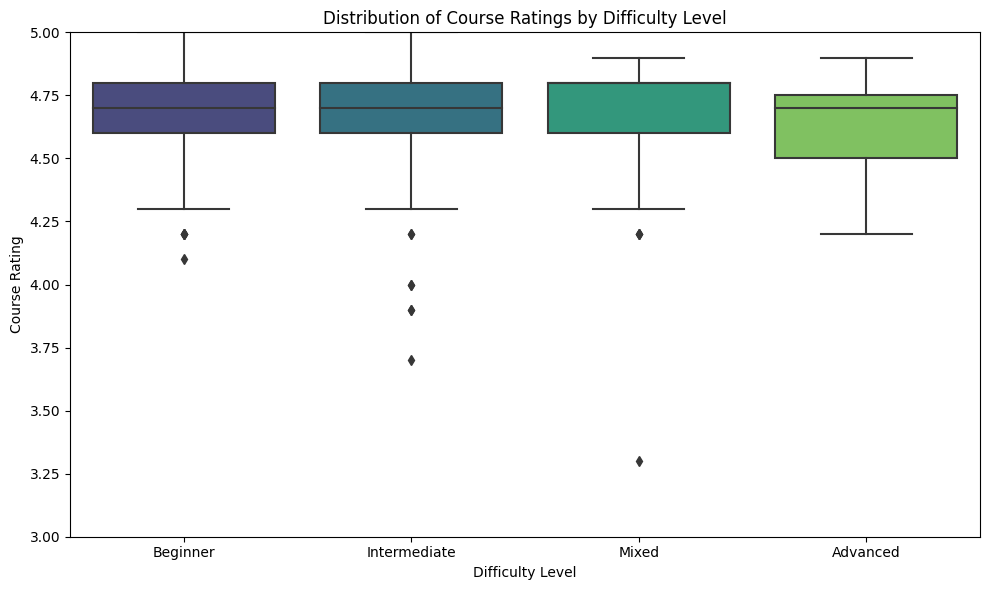

In [324]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='course_difficulty', y='course_rating', palette='viridis')
plt.title('Distribution of Course Ratings by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Course Rating')
plt.ylim(3, 5)
plt.tight_layout()
plt.show()

### **Question 09**: Can potential outliers be identified that might impact the overall analysis quality?

A common thread observed among the top 5 courses with the lowest average rating is their difficulty level. Three out of the five courses, namely "Machine Learning and Reinforcement Learning in Finance Specialization," "Machine Learning for Trading," and "iOS App Development with Swift," have an intermediate difficulty level.

The intermediate difficulty level might be demanding for learners without sufficient prior knowledge or experience in the subject matter. As a result, learners could experience frustration and dissatisfaction, leading to lower average ratings.

In [325]:
from tabulate import tabulate

difficulty_levels = df['course_difficulty'].unique()
for difficulty_level in difficulty_levels:
    outliers = check_outliers(df[df['course_difficulty'] == difficulty_level], 'course_rating')
    if not outliers.empty:
        print(f"Outliers in '{difficulty_level}' difficulty level:")
        print(tabulate(outliers, headers='keys', tablefmt='psql'))
        print("\n")

Outliers in 'Beginner' difficulty level:
+-----+---------------------------------------+----------------------------------+---------------------------+-----------------+---------------------+----------------------------+
|     | course_title                          | course_organization              | course_Certificate_type   |   course_rating | course_difficulty   |   course_students_enrolled |
|-----+---------------------------------------+----------------------------------+---------------------------+-----------------+---------------------+----------------------------|
|  59 | Aprende a programar con Python        | Universidad Austral              | SPECIALIZATION            |             4.2 | Beginner            |                       6600 |
| 182 | Cybersecurity and Its Ten Domains     | University System of Georgia     | COURSE                    |             4.2 | Beginner            |                     140000 |
| 414 | How to Start Your Own Business        | Michigan St

### **Question 10**: How does the certificate type influence the number of students enrolled in courses?

* Courses account for the largest proportion, with 65.3% of the total. These are likely to be individual courses on various subjects or topics offered by different organizations.
* Professional certificates represent a smaller proportion, accounting for only 1.3% of the dataset. These certificates likely focus on specific skillsets or career paths, leading to a more targeted audience. Consequently, the number of students enrolled in professional certificate programs may be lower compared to regular courses.
* Specializations make up approximately 33.3% of the dataset. The higher percentage of specializations indicates that learners may show a preference for in-depth and structured learning experiences.

<ipython-input-326-fa85bf6994d0>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x='course_Certificate_type', y='course_students_enrolled', palette='viridis', size=5)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


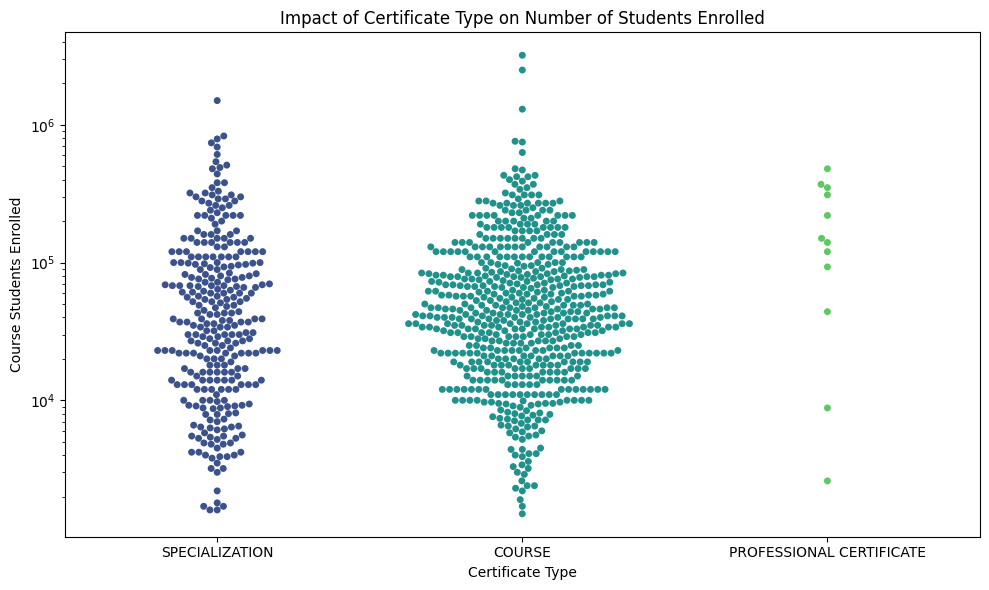

In [326]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='course_Certificate_type', y='course_students_enrolled', palette='viridis', size=5)
plt.title('Impact of Certificate Type on Number of Students Enrolled')
plt.xlabel('Certificate Type')
plt.ylabel('Course Students Enrolled')
plt.yscale('log')  # Logarithmic scale for the y-axis to handle the wide range of student enrollment values
plt.tight_layout()
plt.show()

### **Question 11**: What is the relationship between course ratings and the number of students enrolled, considering different certificate types?

"Specialization" certificate type, it can be noticed that when the number of students enrolled increases, the average course rating slightly decreases. This observation suggests that as the student enrollment in specializations grows, it may become challenging to maintain the same level of personalized engagement, leading to a slight decline in the average course rating.

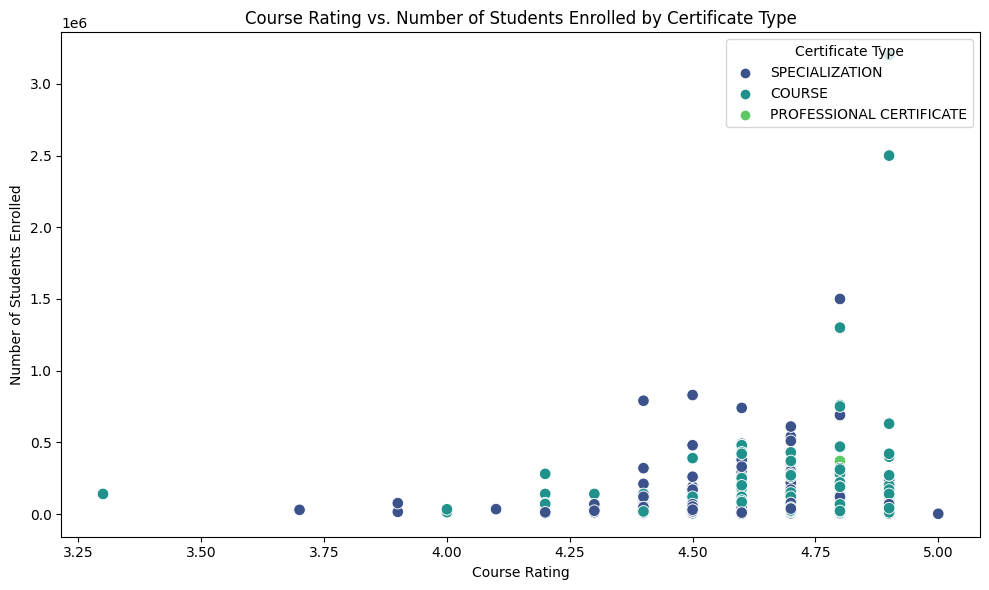

In [327]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='course_rating', y='course_students_enrolled', hue='course_Certificate_type', palette='viridis', s=70)
plt.title('Course Rating vs. Number of Students Enrolled by Certificate Type')
plt.xlabel('Course Rating')
plt.ylabel('Number of Students Enrolled')
plt.legend(title='Certificate Type', loc='upper right')
plt.tight_layout()
plt.show()

### **Question 12**: How does the difficulty level of courses vary across different certificate types?Top 5 universities with the most courses:

* Courses under the "Professional Certificate" type are more focused on specific skill development and may have a structured learning path, leading to a clearer distinction between beginner and intermediate levels.
* "Course" type, there is a more diverse distribution of difficulty levels, with a significant portion classified as "Mixed." This implies that courses offered under the "Course" type may cover a wider range of topics and cater to learners with varying levels of expertise.

<Figure size 5000x1100 with 0 Axes>

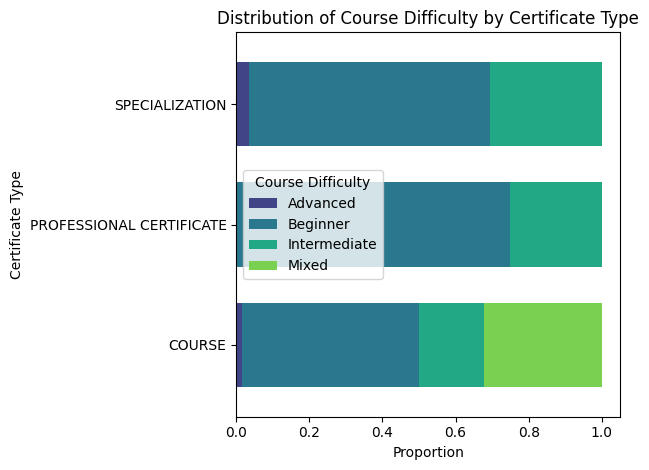

In [328]:
difficulty_counts = df.groupby(['course_Certificate_type', 'course_difficulty']).size().unstack(fill_value=0)

difficulty_proportions = difficulty_counts.div(difficulty_counts.sum(axis=1), axis=0)

plt.figure(figsize=(50, 11))
difficulty_proportions.plot(kind='barh', stacked=True, color=sns.color_palette('viridis', len(difficulty_proportions.columns)), width=0.7)
plt.title('Distribution of Course Difficulty by Certificate Type')
plt.ylabel('Certificate Type')
plt.xlabel('Proportion')
plt.legend(title='Course Difficulty', loc='center left')
plt.tight_layout()
plt.show()

In conclusion, courses leading to professional certifications typically include beginner and intermediate difficulty levels, whereas general courses are more likely to have mixed difficulty levels. This implies using a personalized strategy while creating specialized courses for students looking to advance their careers.

Additional information on teacher credentials, learner demographics, and sentiment analysis of course reviews could be used to acquire deeper insights into learner preferences and satisfaction. Such data can assist educational institutions in streamlining their course offerings and improving the overall quality of the educational process.